# Workspace Setup

In [1]:
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data from Current Folder into four dataframes

In [2]:
df_sales = pd.read_csv('sales_train_v2.csv')
df_item_categories = pd.read_csv('item_categories.csv')
df_items = pd.read_csv('items.csv')
df_shops = pd.read_csv('shops.csv')

In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


# Sales Column descriptions from kaggle challenge website:
date - date in format dd/mm/yyyy<BR>
date_block_num - a consecutive month number. January 2013 is 0, February 2013 is 1,..., October 2015 is 33<BR>
shop_id - unique identifier of a shop<BR>
item_id - unique identifier of a product<BR>
item_price - current price of an item<BR>
item_cnt_day - number of products sold. You are predicting a monthly amount of this measure<BR>

# Check for nulls or outliers

In [4]:
df_mod = df_sales[~df_sales.isnull().any(axis=1)]
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [5]:
df_small_prices = df_sales[df_sales['item_price'] < 1]
df_small_prices.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4658 entries, 484683 to 2931312
Data columns (total 6 columns):
date              4658 non-null object
date_block_num    4658 non-null int64
shop_id           4658 non-null int64
item_id           4658 non-null int64
item_price        4658 non-null float64
item_cnt_day      4658 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 254.7+ KB


In [6]:
df_large_prices = df_sales[df_sales['item_price'] > 100000]
df_large_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1163158 to 1163158
Data columns (total 6 columns):
date              1 non-null object
date_block_num    1 non-null int64
shop_id           1 non-null int64
item_id           1 non-null int64
item_price        1 non-null float64
item_cnt_day      1 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 56.0+ bytes


There are no nulls in any row in our data, but one price was -1 and 4658 entries had prices that were less than 1, which could throw off our data.  There is also one item greater than 100000 that is out of the ordinary.

In [7]:
# remove items whose price is less than 0
df_normal_sales = df_sales[df_sales['item_price'] > 0]
df_normal_sales = df_normal_sales[df_normal_sales['item_price'] < 100000]
df_normal_sales.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935847 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 156.8+ MB


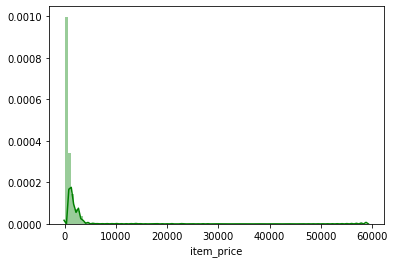

In [8]:
sns.distplot(df_normal_sales['item_price'], color='g', bins=100, hist_kws={'alpha': 0.4});

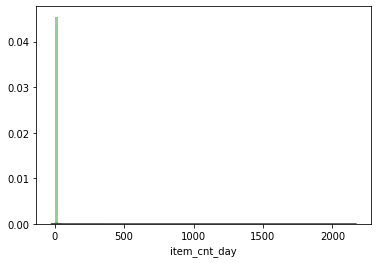

In [9]:
sns.distplot(df_normal_sales['item_cnt_day'], color='g', bins=100, hist_kws={'alpha': 0.4});

# Explore first few rows of data in each dataframe

In [10]:
df_normal_sales['item_price'].describe()

count    2.935847e+06
mean     8.907489e+02
std      1.720490e+03
min      7.000000e-02
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      5.920000e+04
Name: item_price, dtype: float64

From the data, each row in the sales dataframs represents one item sold.

In [11]:
df_item_categories.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


The categories seem to be gaming console types.

In [12]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


Each item in the items table belongs to a category

# Plot sales by Shop

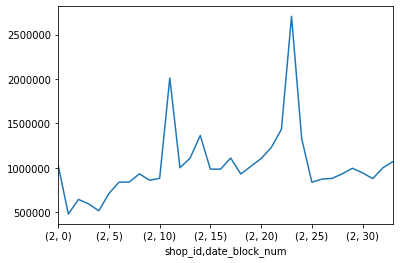

In [13]:
# plot the sum of all sales for shop 2 by month
df_shop2 = df_normal_sales.loc[df_normal_sales['shop_id']==2]
group2 = df_shop2.groupby(['shop_id','date_block_num'])['item_price'].sum()
group2.plot(kind='line')


Shop 2 is performing consistently.  We can see peaks at month 11 and month 23 which correspond to months in December, for holiday sales.

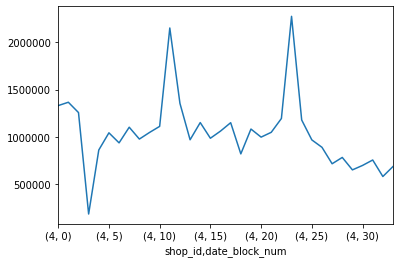

In [14]:
# plot the sum of all sales for shop 4 by month
df_shop4 = df_normal_sales.loc[df_normal_sales['shop_id']==4]
group4 = df_shop4.groupby(['shop_id','date_block_num'])['item_price'].sum()
group4.plot(kind='line')


Shop 4 is performing worse over time, but it has the same peaks as Shop 2 during December.

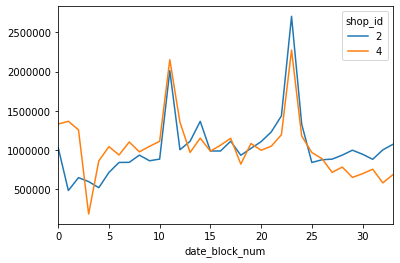

In [15]:
df_shop24 = df_normal_sales.loc[(df_normal_sales['shop_id']==4) | (df_normal_sales['shop_id']==2)]
group24 = df_shop24.groupby(['shop_id','date_block_num'])['item_price'].sum()
group24.unstack(level=0).plot()


Compare shop_id 2 and 4 and they seem similar

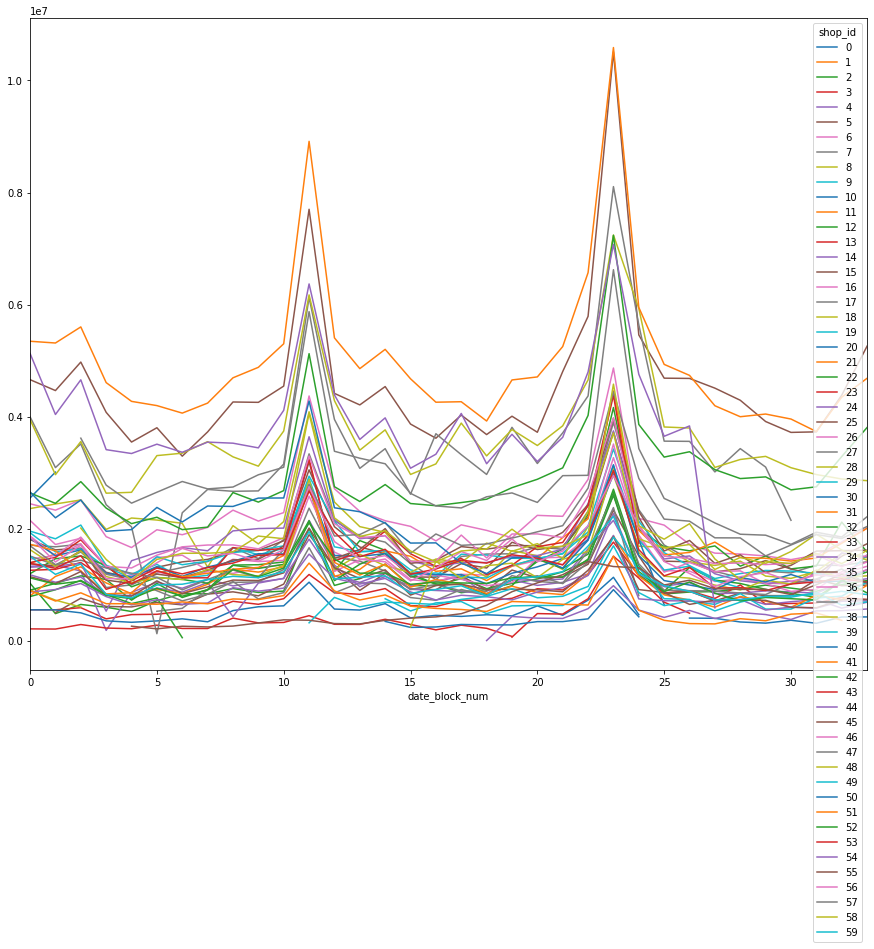

In [16]:
df_shop_all = df_normal_sales.loc[(df_normal_sales['item_cnt_day'])>0 ]
group_all = df_shop_all.groupby(['shop_id','date_block_num'])['item_price'].sum()
fig, ax = plt.subplots(figsize=(15,12))
ax = group_all.unstack(level=0).plot(ax=ax)

# Stores with Sales in only two months

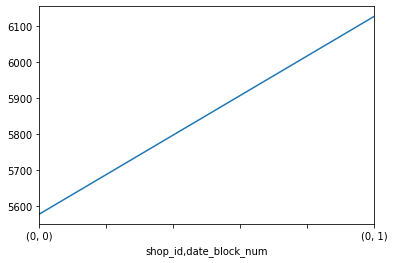

In [28]:
# plot the sum of all sales for shop 0 by month
df_shop0 = df_normal_sales.loc[df_normal_sales['shop_id']==0]
group0 = df_shop0.groupby(['shop_id','date_block_num'])['item_cnt_day'].sum()
group0.plot(kind='line')

In [18]:
#df_shop01 = df_normal_sales.loc[(df_normal_sales['date_block_num']==2)]
#df_shop01 = df_normal_sales.loc[(df_normal_sales['item_cnt_day'].isnull())]

#shop0 = df_normal_sales.loc[df_normal_sales['shop_id']==0]
#shop0 = df_normal_sales.loc[df_normal_sales['date_block_num']==3]
#shop0 = df_normal_sales.groupby(['date_block_num'])['item_cnt_day'].sum()

#group_all = df_shop_all.groupby(['shop_id','date_block_num'])['item_price'].sum()
#fig, ax = plt.subplots(figsize=(15,12))
#ax = group_all.unstack(level=0).plot(ax=ax)

In looking at some stores, I found some stores only sold items in date_block_num 0 and 1. Could this mean the store closed after 2 months?  Or it changed names?  We might need to exclude this data from the prediction because if it only sold in month 0 and 1 we don't expect any sales in month 34.

# Plot sales by type

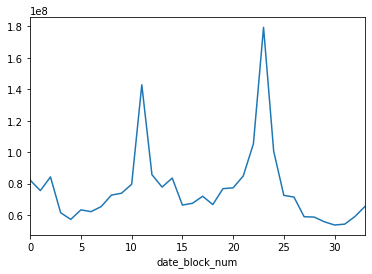

In [19]:

group_all = df_normal_sales.groupby(['date_block_num'])['item_price'].sum()
group_all.plot(kind='line')



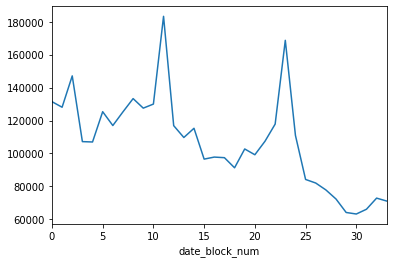

In [20]:

group_all = df_normal_sales.groupby(['date_block_num'])['item_cnt_day'].sum()
group_all.plot(kind='line')

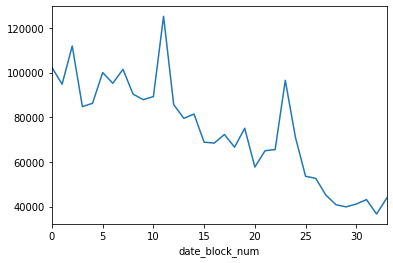

In [21]:
df_small_sales = df_sales[df_sales['item_price'] < 800]
group_small = df_small_sales.groupby(['date_block_num'])['item_cnt_day'].sum()
group_small.plot(kind='line')

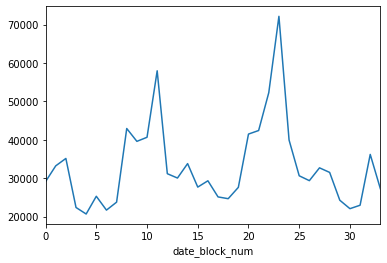

In [22]:
df_big_sales = df_sales[df_sales['item_price'] > 800]
group_big = df_big_sales.groupby(['date_block_num'])['item_cnt_day'].sum()
group_big.plot(kind='line')

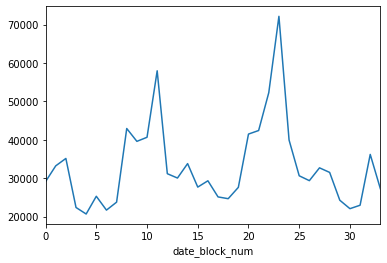

In [23]:
group_big = df_big_sales.groupby(['date_block_num'])['item_cnt_day'].sum()
group_big.plot(kind='line')

print(df_big_sales)

In [24]:
df_big_sales['item_price'].max()

307980.0

sales of higher priced items (over 800) are selling more steadily, while the lower priced items tend to be trending downwards.

Questions to answer:

1. Is there any null data in our dataset?  Do we need to pre-process the data? Use isnull to find out. Clean the data and ignore outliers.

2. What is the most sold item?  Group by item and sort.  Is this item an outlier or does it follow the general trend of other items?  Plot vs time.  If it is an outlier it could skew our data so this item might need to be treated separately.

3. We know from the example notebooks that we can plot all items vs time and we will see they are seasonal and trending downwards.  But are all individual categories seasonal?  Plot total items sold in each category vs time.  To predict our future sales, we might need to apply different rules for different categories.  Which category sold the most?  Plot total items sold in each category over time.  When plotting over time, is it better to group by category or store compared to adding all items together?

4. Which store sold the most items? Group by store.  Does each store trend the same way over time?  If a store sells equally well all year round they might be treated differently in our sales prediction.

5. Find any correlation between shop_id and categories.